<a href="https://colab.research.google.com/github/araujoheloysa/DIO_BairesDev_Machine-Learning-Practitioner/blob/main/Image_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import libraries**

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

# **2. Creating the function**

In [7]:
def convert_to_grayscale_manual(image_path, output_path):
    image = cv2.imread(image_path)
    gray_image = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8) # Creates a grayscale image of the same size

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            gray_value = int(0.299 * image[y, x, 0] + 0.587 * image[y, x, 1] + 0.114 * image[y, x, 2])
            gray_image[y, x] = gray_value

    cv2.imwrite(output_path, gray_image)
    return gray_image

def convert_to_black_and_white_manual(gray_image, output_path, threshold=127):
    bw_image = np.zeros_like(gray_image, dtype=np.uint8)  # Creates a black and white image of the same size
    for y in range(gray_image.shape[0]):
        for x in range(gray_image.shape[1]):
            if gray_image[y, x] < threshold:
                bw_image[y, x] = 0  # Black
            else:
                bw_image[y, x] = 255  # White
    cv2.imwrite(output_path, bw_image)
    return bw_image

# **3. Uploading the image to Colab**

In [8]:
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# converts to grayscale
gray_image = convert_to_grayscale_manual(image_name, 'output_gray.jpg')

# converts to black and white
bw_image = convert_to_black_and_white_manual(gray_image, 'output_bw.jpg')

Saving zebrafish-luchiari-baixo.png to zebrafish-luchiari-baixo (1).png


# **4. Plotting image**

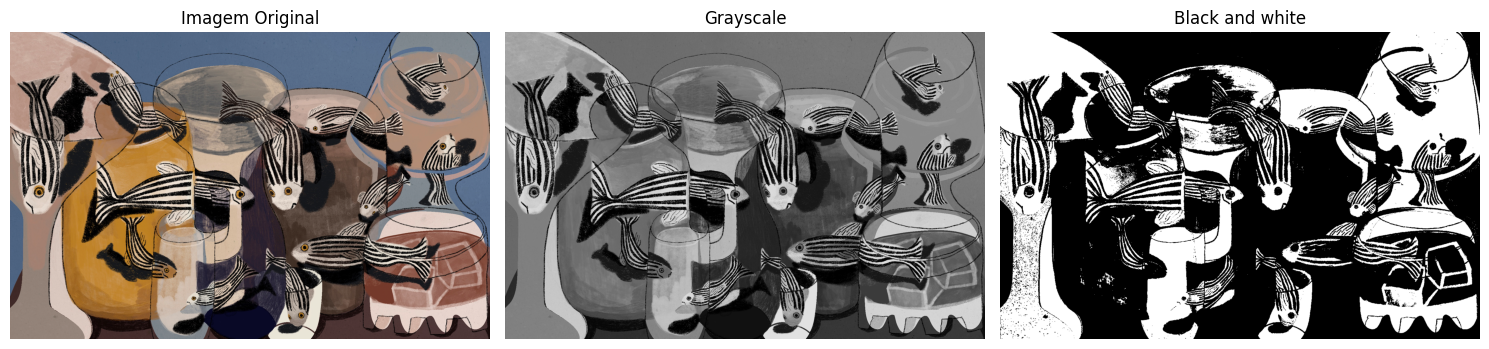

In [9]:
plt.figure(figsize=(15, 5))  # Adjust the size

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB))  # Displays the original image
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')  # Displays the image in grayscale
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(bw_image, cmap='gray')  # Displays the image in BW
plt.title('Black and white')
plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# (Optional) Download the converted images
# files.download('output_gray.jpg')
# files.download('output_bw.jpg')